In [144]:
#importing packages needed for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

#read in the data
df = pd.read_csv(r'C:\Users\Abhichandra\Downloads\movies.csv')

In [78]:
#let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [80]:
#Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [82]:
#data types of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [94]:
#adjusting data types of some colu
df['votes'] = df['votes'].fillna(0).astype('int64')
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [96]:
#drop rows with non finite values in the rating column
df = df.dropna(subset=['rating'])

In [68]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.0,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.0,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.0,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.0,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.0,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.0,1300,Teng Cheng,NaN,Guangtao Jiang,China,0,240663149,Beijing Enlight Pictures,110
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.0,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.0,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,0,13266,Roxwell Films,87


In [148]:
#sorting the data in descending order
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [102]:
# dropping duplicate values in the data set
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300,Teng Cheng,NaN,Guangtao Jiang,China,0,240663149,Beijing Enlight Pictures,110
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,0,413378,Pryor Entertainment,120
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,0,13266,Roxwell Films,87


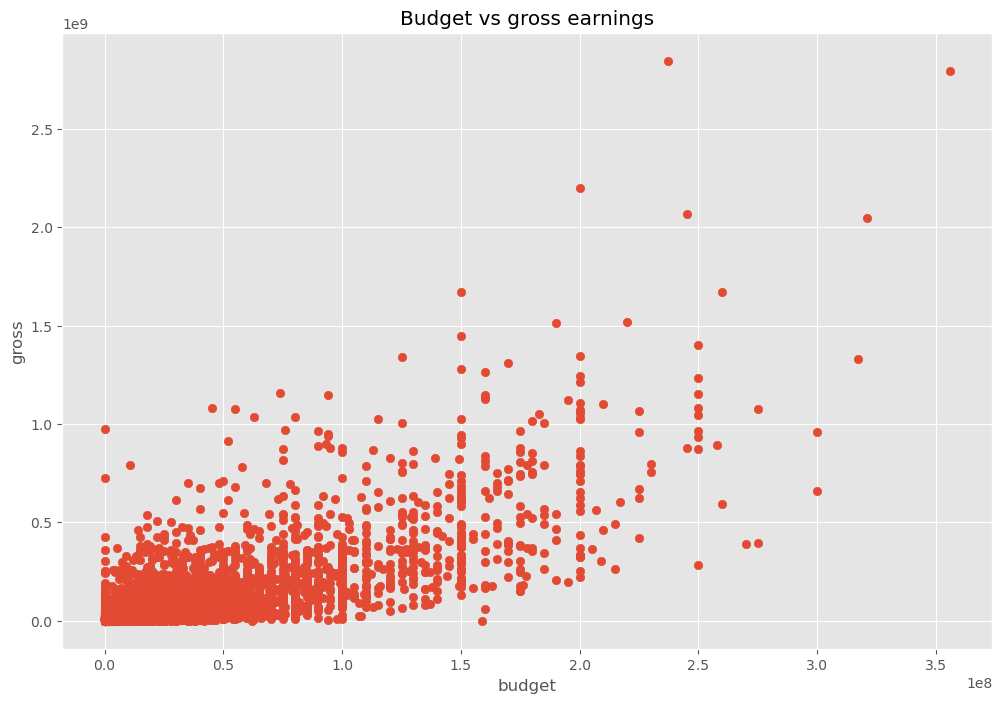

In [110]:
#scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs gross earnings')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

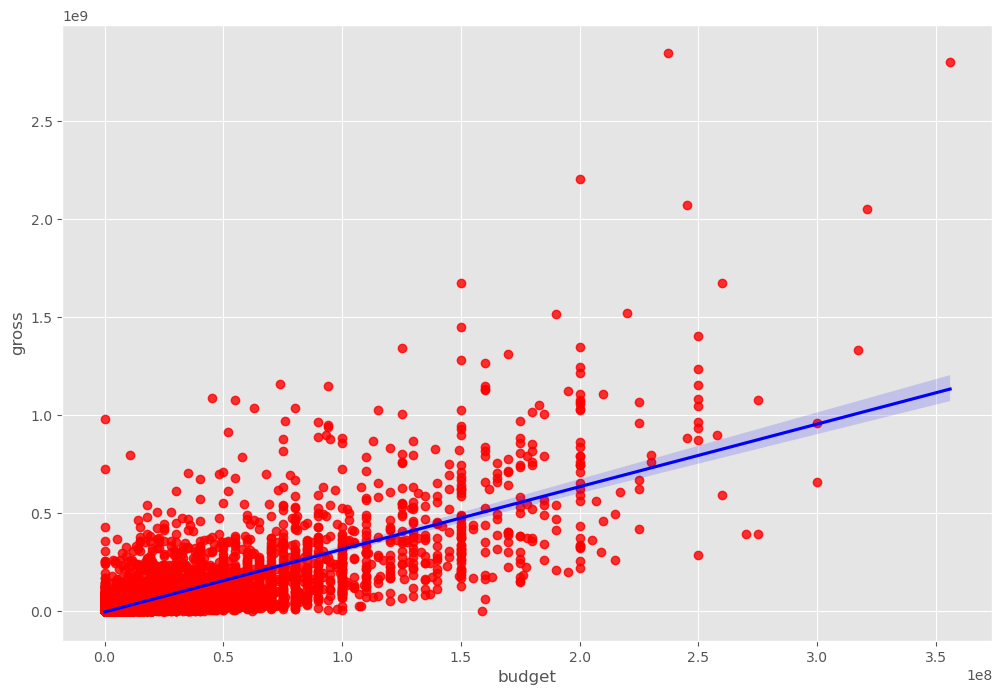

In [122]:
#plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [132]:
#correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

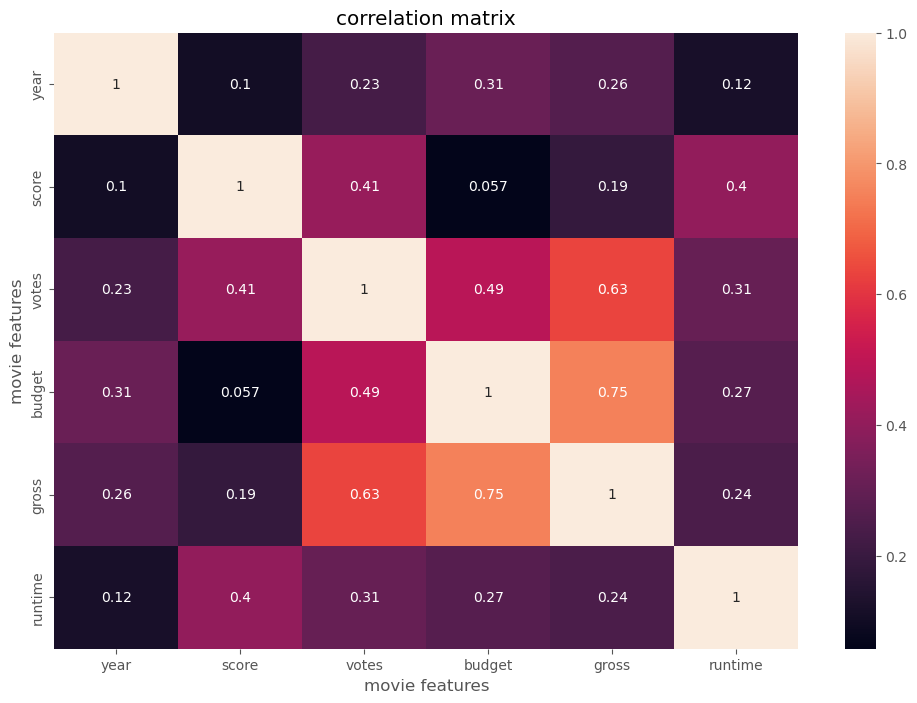

In [136]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [140]:
df_numeric = df

for col_name in df_numeric:
    if(df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name] = df_numeric[col_name].astype('category')
        df_numeric[col_name] = df_numeric[col_name].cat.codes

df_numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,528,5,0,2009,690,7.8,1100000,1139,1759,2289,55,237000000,2847246203,2212,162
7445,530,5,0,2019,182,8.4,903000,160,732,2198,55,356000000,2797501328,1575,181
3045,6827,5,6,1997,698,7.8,1100000,1139,1759,1565,55,200000000,2201647264,2212,194
6663,5086,5,0,2015,692,7.8,876000,1109,2522,509,55,245000000,2069521700,1509,138
7244,531,5,0,2018,191,8.4,897000,160,732,2198,55,321000000,2048359754,1575,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1145,5,0,1987,1063,5.6,9100,2593,2591,1793,55,10000000,0,1740,99
1042,153,4,6,1986,342,5.9,675,493,759,150,14,0,0,1462,102
1041,3341,6,0,1986,113,4.0,437,859,2547,1562,55,0,0,91,90
1040,300,6,6,1986,1078,3.7,922,694,1075,617,55,0,0,737,90


In [150]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


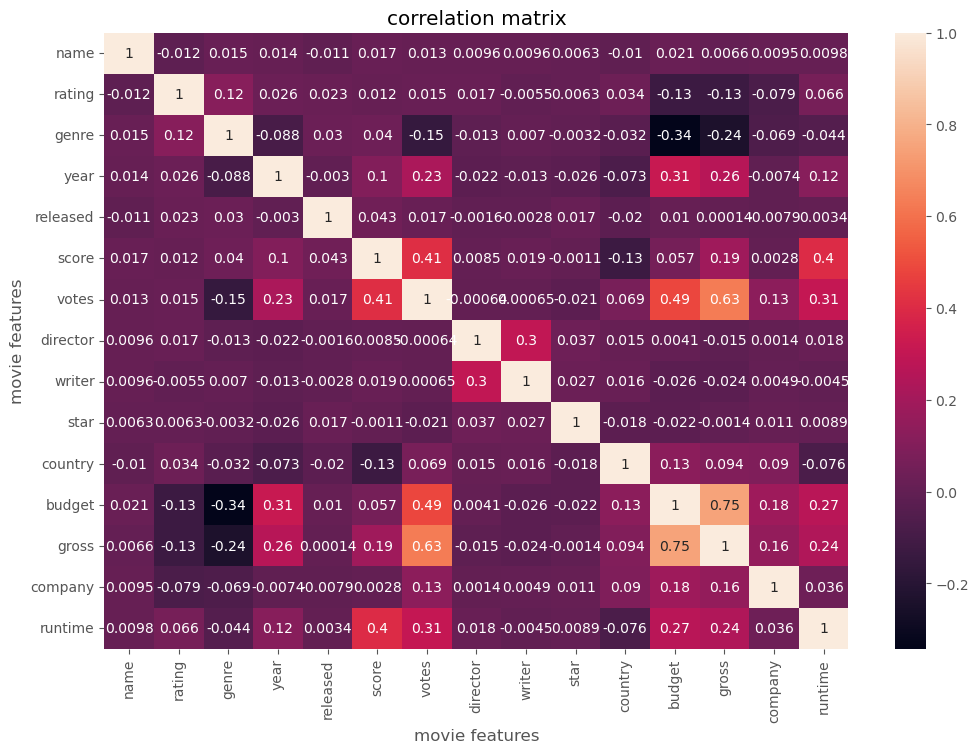

In [152]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

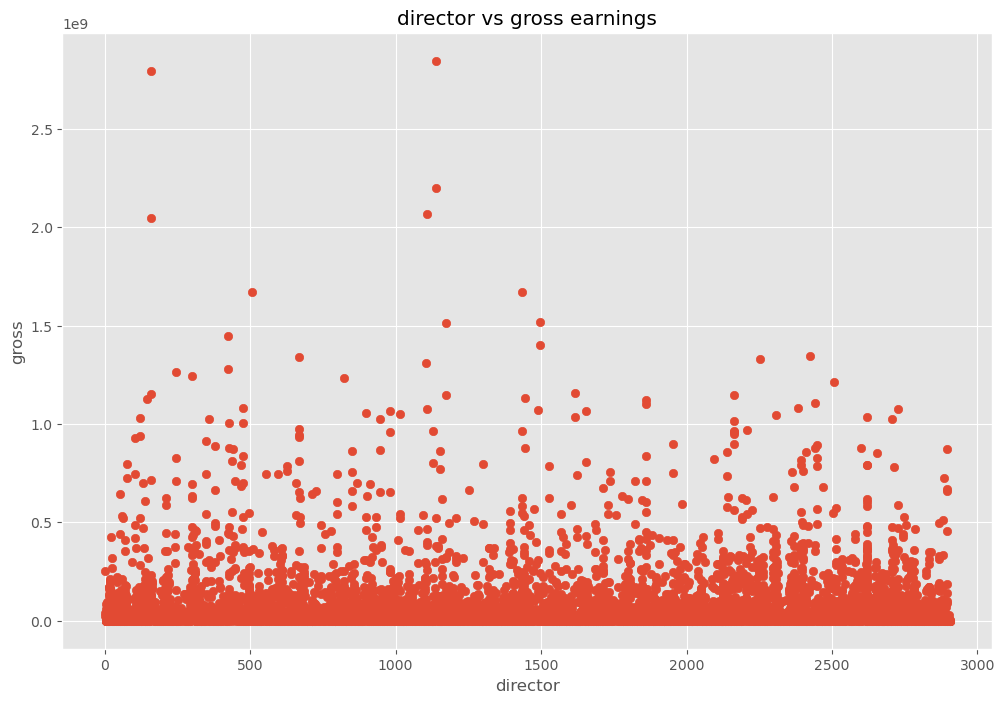

<Axes: xlabel='director', ylabel='gross'>

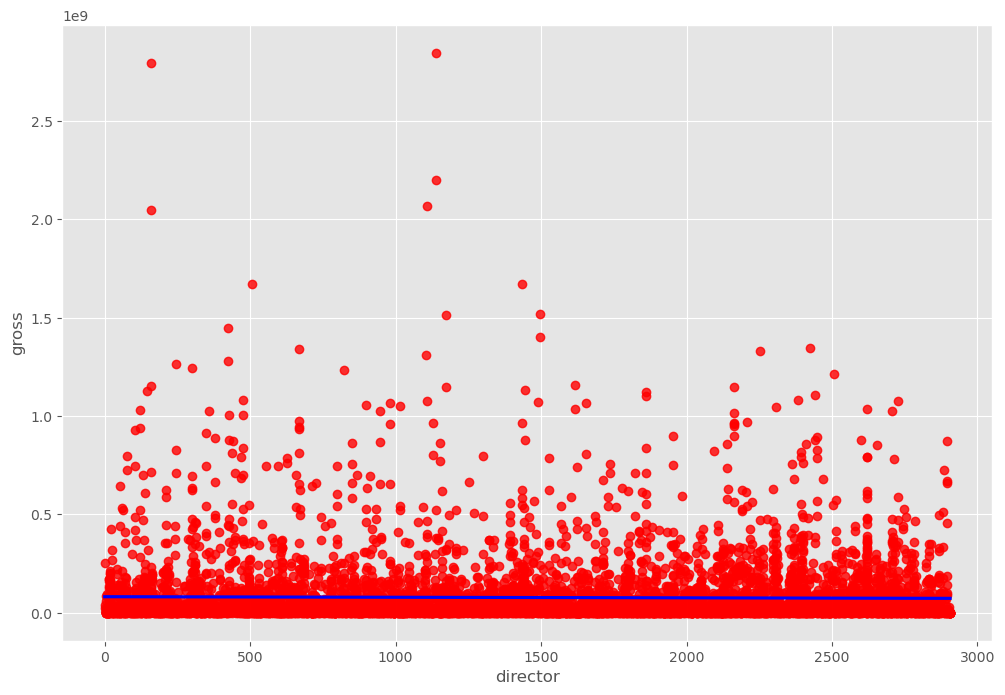

In [158]:
plt.scatter(x=df_numeric['director'], y=df_numeric['gross'])
plt.title('director vs gross earnings')
plt.xlabel('director')
plt.ylabel('gross')
plt.show()

sns.regplot(x='director', y='gross', data=df_numeric, scatter_kws={"color":"red"}, line_kws={"color":"blue"})